In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/liyuhao413/filepit/main/world-data-2023.csv'
df = pd.read_csv(url)
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [2]:
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
                      'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 
                      'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 
                      'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']

df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

C:\Users\ishan\AppData\Local\Temp\ipykernel_29072\4057559009.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))


In [3]:
columns_with_missing = df.columns[df.isnull().any()]

numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

In [4]:
countries = df['Country']

columns_to_drop = ['Country', 'Abbreviation', 'Calling Code', 'Capital/Major City',
                   'Currency-Code', 'Largest city', 'Official language',
                   ]

df = df.drop(columns=columns_to_drop)

df.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60.0,58.1,652230.0,323000.000000,32.49,8672.0,149.900000,2.300000,4.47,2.1,...,78.4,0.28,38041754.0,48.900000,9.300000,71.400000,11.120000,9797273.0,33.939110,67.709953
1,105.0,43.1,28748.0,9000.000000,11.78,4536.0,119.050000,1.400000,1.62,28.1,...,56.9,1.20,2854191.0,55.700000,18.600000,36.600000,12.330000,1747593.0,41.153332,20.168331
2,18.0,17.4,2381741.0,317000.000000,24.28,150006.0,151.360000,2.000000,3.02,0.8,...,28.1,1.72,43053054.0,41.200000,37.200000,66.100000,11.700000,31510100.0,28.033886,1.659626
3,164.0,40.0,468.0,159274.853801,7.20,469.0,190.460955,6.722346,1.27,34.0,...,36.4,3.33,77142.0,62.738068,16.573964,40.822404,6.886364,67873.0,42.506285,1.521801
4,26.0,47.5,1246700.0,117000.000000,40.73,34693.0,261.730000,17.100000,5.52,46.3,...,33.4,0.21,31825295.0,77.500000,9.200000,49.100000,6.890000,21061025.0,-11.202692,17.873887


In [ ]:
df.to_csv("C:\\Users\\super\\Downloads\\world-data-2023_clean.csv", index=False)

In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split

X = np.delete(np.array(df), 15, axis = 1)
y = np.array(df['Life expectancy'])
y[113] = 89.6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
headers = np.array(df.keys())
headers = np.delete(np.array(headers), 15, axis = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
import torch.optim as optim  
import torchvision  
from torchmetrics import R2Score

c:\Users\ishan\OneDrive\Documents\Python Scripts\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
class LinNet(nn.Module):
    def __init__(self, hidden_layer1_size=50, hidden_layer2_size=50, drop_rate=0.15, input_size = 27, output_size = 1):
        super().__init__()
        self.drop_rate = drop_rate
        self.state = 0
        
        self.input_layer = nn.Linear(input_size, hidden_layer1_size)
        self.hidden_layer = nn.Linear(hidden_layer1_size, hidden_layer2_size)
        self.output_layer = nn.Linear(hidden_layer2_size, output_size)
        self.dropout = nn.Dropout(self.drop_rate)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        x = self.relu(x)   
        return x

In [11]:
def train(model, inputs, labels, loss_fn, optimizer, epoch=-1):
    total_loss = 0
    model.train()  
    labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    final_loss = total_loss / len(inputs)
    return final_loss

In [12]:
def test(model, inputs, labels, loss_fn, epoch=-1):
    total_loss = 0
    model.eval()  # Set model in evaluation mode
    labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        total_loss += loss.item()

    final_loss = total_loss / len(inputs)
    return final_loss

In [13]:
def kfold(data, labels, k, folds):
    datalength = len(data)
    batch_size = int(datalength / folds)
    remainder = int(datalength % folds)

    if k == 0:
        val_indices = list(range(k*batch_size, (k+1)*batch_size + remainder))
        train_indices = [i for i in range(len(data)) if i not in val_indices]

        val_batch = [data[i] for i in val_indices]
        train_batch = [data[i] for i in train_indices]

        val_labels = [labels[i] for i in val_indices]
        train_labels = [labels[i] for i in train_indices]
    else:
        val_indices = list(range(k*batch_size + remainder , (k+1)*batch_size + remainder))
        train_indices = [i for i in range(len(data)) if i not in val_indices]

        val_batch = [data[i] for i in val_indices]
        train_batch = [data[i] for i in train_indices]

        val_labels = [labels[i] for i in val_indices]
        train_labels = [labels[i] for i in train_indices]
    
    return train_batch, val_batch, train_labels, val_labels

In [14]:
def kfold(data, labels, k, folds):
    indices = np.arange(len(data))
    fold_size = len(data) // folds
    remainder = len(data) % folds

    val_indices = []
    train_indices = []

    for i in range(folds):
        start = i * fold_size
        end = start + fold_size
        if i < remainder:
            end += 1
        if i == k:
            val_indices.extend(range(start, end))
        else:
            train_indices.extend(range(start, end))

    train_batch = data[train_indices]
    val_batch = data[val_indices]
    train_labels = labels[train_indices]
    val_labels = labels[val_indices]

    return train_batch, val_batch, train_labels, val_labels

In [15]:
import optuna

def objective(trial, X_train, y_train):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)
    hidden_layer_size1 = trial.suggest_int('hidden_layer_size1', 15, 25)
    hidden_layer_size2 = trial.suggest_int('hidden_layer_size2', 15, 25)
    dropout_rate = trial.suggest_float('dropout_rate',0.25, 0.4)
    NUM_EPOCHS = trial.suggest_int('epochs', 70, 80)
    
    model_optuna = LinNet(hidden_layer1_size=hidden_layer_size1, hidden_layer2_size=hidden_layer_size2, drop_rate=dropout_rate)
    optimizer = optim.Adam(model_optuna.parameters(), learning_rate)

    loss_fn1 = nn.MSELoss()
    loss_fn2 = nn.L1Loss()
    loss_fn3 = R2Score()

    train_losses = []
    val_losses_fn1 = []
    val_losses_fn2 = []
    val_losses_fn3 = []
    k_folds = 10

    for epoch in range(NUM_EPOCHS):   
        data = [(list(X_train[i]), y_train[i]) for i in range(len(y_train))]
        np.random.shuffle(data)

        X_train = np.array([data[i][0] for i in range(len(y_train))])
        y_train = np.array([data[i][-1] for i in range(len(y_train))])

        train_losses_k = []
        val_losses_k_fn1 = []
        val_losses_k_fn2 = []
        val_losses_k_fn3 = []

        for k in range(k_folds):
            kfold_batch_train, kfold_batch_val, kfold_batch_train_labels, kfold_batch_val_labels = kfold(X_train, y_train, k, k_folds)
            inputs = torch.tensor(kfold_batch_train, dtype=torch.float32)
            train_loss_k = train(model_optuna, inputs, kfold_batch_train_labels, loss_fn1, optimizer, epoch)
        
            inputs = torch.tensor(kfold_batch_val, dtype=torch.float32)
            test_loss_k_fn1 = test(model_optuna, inputs, kfold_batch_val_labels, loss_fn1, epoch=-1)
            test_loss_k_fn2 = test(model_optuna, inputs, kfold_batch_val_labels, loss_fn2, epoch=-1)
            test_loss_k_fn3 = test(model_optuna, inputs, kfold_batch_val_labels, loss_fn3, epoch=-1)

            train_losses_k.append(train_loss_k)
            val_losses_k_fn1.append(test_loss_k_fn1)
            val_losses_k_fn2.append(test_loss_k_fn2)
            val_losses_k_fn3.append(test_loss_k_fn3)
        
        train_losses.append(np.average(train_losses_k))
        val_losses_fn1.append(np.average(val_losses_k_fn1))
        val_losses_fn2.append(np.average(val_losses_k_fn2))
        val_losses_fn3.append(np.average(val_losses_k_fn3))

    possible_train = np.sqrt(abs(val_losses_fn3[-1])) + abs(val_losses_fn2[-1]) + abs(val_losses_fn3[-1])/10

    return possible_train

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50)
best_params = study.best_params

[I 2024-04-22 07:22:22,612] A new study created in memory with name: no-name-1d50bd56-0ff3-40cc-a869-a0f5ae7f6cc5
[I 2024-04-22 07:22:24,086] Trial 0 finished with value: 5.356053135964644 and parameters: {'learning_rate': 0.00019724866341312992, 'hidden_layer_size1': 18, 'hidden_layer_size2': 18, 'dropout_rate': 0.3549923716185711, 'epochs': 77}. Best is trial 0 with value: 5.356053135964644.
[I 2024-04-22 07:22:25,351] Trial 1 finished with value: 7.604675183514101 and parameters: {'learning_rate': 1.8792788261817424e-05, 'hidden_layer_size1': 24, 'hidden_layer_size2': 21, 'dropout_rate': 0.2899531052135115, 'epochs': 80}. Best is trial 0 with value: 5.356053135964644.
[I 2024-04-22 07:22:26,611] Trial 2 finished with value: 1.2182906705564445 and parameters: {'learning_rate': 0.0006844595077282084, 'hidden_layer_size1': 17, 'hidden_layer_size2': 19, 'dropout_rate': 0.37119922411910244, 'epochs': 78}. Best is trial 2 with value: 1.2182906705564445.
[I 2024-04-22 07:22:27,731] Trial 3

In [16]:
lr = best_params['learning_rate']
hidden_layer_size1 = best_params['hidden_layer_size1']
hidden_layer_size2 = best_params['hidden_layer_size2']
dropout_rate = best_params['dropout_rate']
NUM_EPOCHS = best_params['epochs']

In [17]:
torch.manual_seed(0)
model = LinNet(hidden_layer1_size=hidden_layer_size1, hidden_layer2_size=hidden_layer_size2, drop_rate=dropout_rate)
optimizer = optim.Adam(model.parameters(), lr)
loss_fn1 = nn.MSELoss()
loss_fn2 = nn.L1Loss()
loss_fn3 = R2Score()

In [18]:
train_losses = []
test_losses_fn1 = []
test_losses_fn2 = []
test_losses_fn3 = []
k_folds = len(y_train)

for epoch in range(NUM_EPOCHS):   
    data = [(list(X_train[i]), y_train[i]) for i in range(len(y_train))]
    np.random.shuffle(data)

    X_train_vals = np.array([data[i][0] for i in range(len(y_train))])
    y_train_vals = np.array([data[i][-1] for i in range(len(y_train))])

    train_losses_k = []

    for k in range(k_folds):
        kfold_batch_train, kfold_batch_val, kfold_batch_train_labels, kfold_batch_val_labels = kfold(X_train_vals, y_train_vals, k, k_folds)
        inputs = torch.tensor(kfold_batch_train, dtype=torch.float32)
        loss = train(model, inputs, kfold_batch_train_labels, loss_fn1, optimizer, epoch)
        train_losses_k.append(loss)
    
    inputs = torch.tensor(X_test, dtype=torch.float32)
    test_loss_fn1 = test(model, inputs, y_test, loss_fn1, epoch=-1)
    test_loss_fn2 = test(model, inputs, y_test, loss_fn2, epoch=-1)
    test_loss_fn3 = test(model, inputs, y_test, loss_fn3, epoch=-1)
    
    train_losses.append(np.average(train_losses_k))
    test_losses_fn1.append(test_loss_fn1)
    test_losses_fn2.append(test_loss_fn2)
    test_losses_fn3.append(test_loss_fn3)

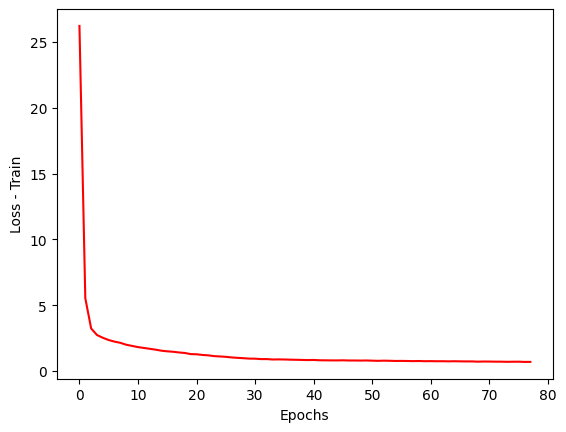

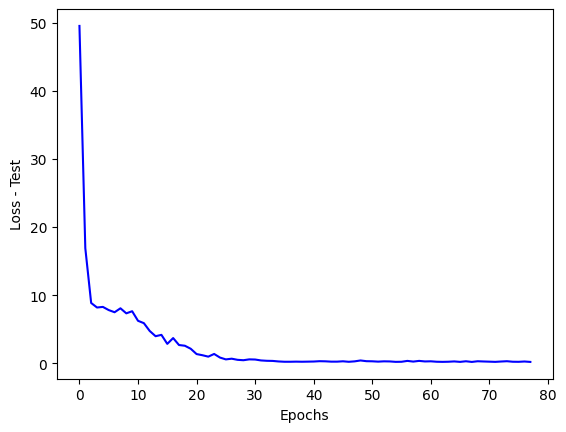

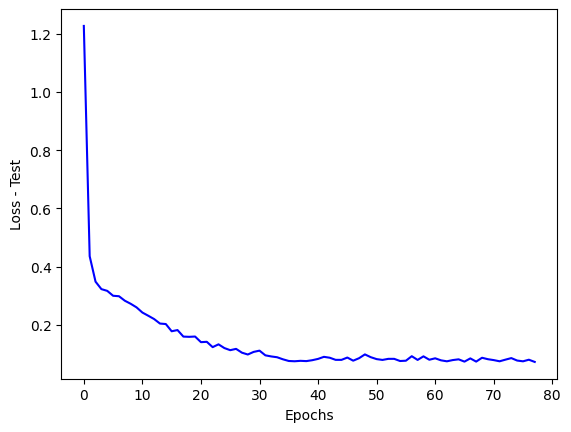

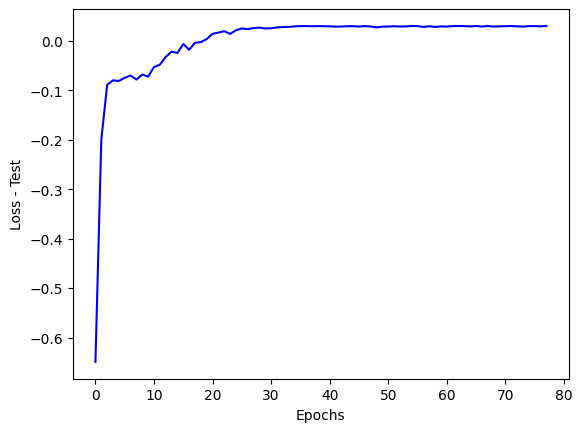

In [19]:
plt.plot(np.arange(NUM_EPOCHS), train_losses, "r")
plt.xlabel("Epochs")
plt.ylabel("Loss - Train")
plt.show()

plt.plot(np.arange(NUM_EPOCHS), test_losses_fn1, "b")
plt.xlabel("Epochs")
plt.ylabel("Loss - Test")
plt.show()

plt.plot(np.arange(NUM_EPOCHS), test_losses_fn2, "b")
plt.xlabel("Epochs")
plt.ylabel("Loss - Test")
plt.show()

plt.plot(np.arange(NUM_EPOCHS), test_losses_fn3, "b")
plt.xlabel("Epochs")
plt.ylabel("Loss - Test")
plt.show()

In [20]:
import torch
import torch.nn as nn
from torchmetrics import R2Score

model.eval()  
with torch.no_grad():
    inputs = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(inputs)

    rmse = np.sqrt(loss_fn1(torch.tensor(y_test, dtype=torch.float32).unsqueeze(1), y_pred))
    mae = loss_fn2(torch.tensor(y_test, dtype=torch.float32).unsqueeze(1), y_pred)
    r2_score = loss_fn3(torch.tensor(y_test, dtype=torch.float32).unsqueeze(1), y_pred)

print(f'R-squared (R2): {r2_score:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

R-squared (R2): 0.90
Root Mean Squared Error (RMSE): 2.51
Mean Absolute Error (MAE): 2.15


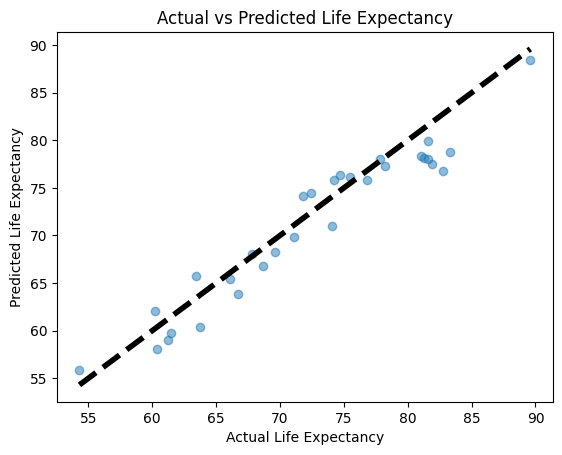

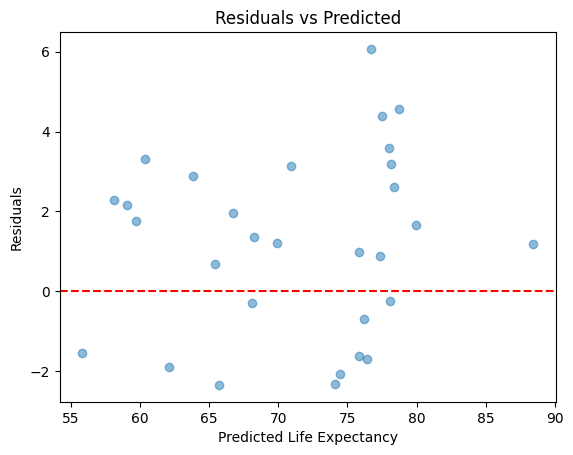

In [21]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

residuals = np.array(y_test).reshape(len(np.array(y_test)), -1) - np.array(y_pred)
plt.scatter(np.array(y_pred), residuals, alpha=0.5)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [22]:
with torch.no_grad():
    model.eval() 
    outputs = model(torch.tensor(scaler.transform(X), dtype=torch.float32))

y_pred = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

rmse = np.sqrt(loss_fn1(outputs, y_pred))
mae = loss_fn2(outputs, y_pred)
r2_score = loss_fn3(outputs, y_pred)

print(f'R-squared (R2): {r2_score:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

R-squared (R2): 0.90
Root Mean Squared Error (RMSE): 2.31
Mean Absolute Error (MAE): 1.86


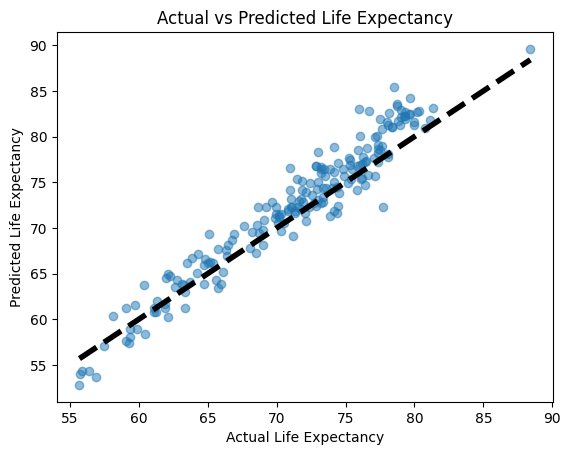

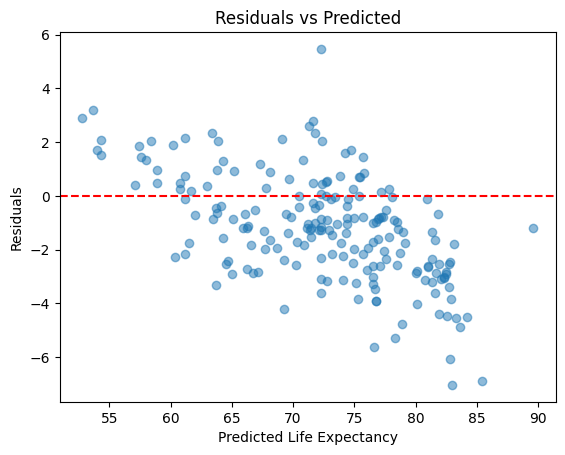

In [23]:
plt.scatter(outputs, y_pred, alpha=0.5)
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], 'k--', lw=4)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

residuals = np.array(outputs).reshape(len(np.array(outputs)), -1) - np.array(y_pred)
plt.scatter(np.array(y_pred), residuals, alpha=0.5)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [24]:
import numpy as np
from scipy.stats import pearsonr

def compute_correlation(X, outputs):
    X_np = X.transpose()

    outputs_np = outputs.flatten()

    correlations = []
    for i in range(X_np.shape[0]): 
        correlation, _ = pearsonr(X_np[i], outputs_np)
        correlations.append(correlation)

    return correlations

correlations = compute_correlation(X, outputs)
corr_DL = list(zip(headers, correlations))

for corr in corr_DL:
    print(corr)

('Density\n(P/Km2)', 0.23627358464567097)
('Agricultural Land( %)', -0.23632434681950718)
('Land Area(Km2)', 0.057801407078580946)
('Armed Forces size', 0.07476416956975594)
('Birth Rate', -0.9178778065091958)
('Co2-Emissions', 0.13229225868626948)
('CPI', -0.17001795825440844)
('CPI Change (%)', -0.14223326973101594)
('Fertility Rate', -0.8774022694352533)
('Forested Area (%)', 0.0060843537931584545)
('Gasoline Price', 0.2635213855617696)
('GDP', 0.18178681211438977)
('Gross primary education enrollment (%)', 0.08727427815902195)
('Gross tertiary education enrollment (%)', 0.7386041512394595)
('Infant mortality', -0.9460537846844799)
('Maternal mortality ratio', -0.8258482800180876)
('Minimum wage', 0.5473010207564771)
('Out of pocket health expenditure', -0.33524023099263967)
('Physicians per thousand', 0.7371606634597514)
('Population', 0.008437797647173784)
('Population: Labor force participation (%)', -0.16939417710646615)
('Tax revenue (%)', 0.34582811855133205)
('Total tax rate'